<a href="https://colab.research.google.com/github/mmalik17/Sales-Analysis/blob/main/e_commerce_purchase_(simplified).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# DATA UNDERSTANDING

In [13]:
data = pd.read_csv('https://github.com/mmalik17/Sales-Analysis/blob/main/Ecommerce%20Purchases.csv?raw=true')

In [14]:
data.head() #look at data sample

#the purpose is to idemtify the data grain of the table. from the table below, it is concluded that every row represent one transaction.

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [15]:
data.columns

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')

In [16]:
data.dtypes 

Address              object
Lot                  object
AM or PM             object
Browser Info         object
Company              object
Credit Card           int64
CC Exp Date          object
CC Security Code      int64
CC Provider          object
Email                object
Job                  object
IP Address           object
Language             object
Purchase Price      float64
dtype: object

In [17]:
data.shape

(10000, 14)

In [18]:
data.describe()

,Credit Card,CC Security Code,Purchase Price
count,1.000000e+04,10000.000000,10000.000000
mean,2.341374e+15,907.217800,50.347302
std,2.256103e+15,1589.693035,29.015836
min,6.040186e+10,0.000000,0.000000
25%,3.056322e+13,280.000000,25.150000
50%,8.699942e+14,548.000000,50.505000
75%,4.492298e+15,816.000000,75.770000
max,6.012000e+15,9993.000000,99.990000


#DATA CLEANING AND PREPARATION

In [19]:
data.isnull().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

In [20]:
#There is no cleaning data needed because there is no missing data

In [21]:
data.duplicated().sum()

0

#RELATIONSHIP ANALYSIS

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


from data.info(), I assumed that the variables that may influence the purchase price are Job, company or address info. In this section, I analyzed the relationship of job, company, and region (from address info) to total purchase

In [23]:
selected_data = data[['Address','Company','Job','Purchase Price']]

In [24]:
selected_data.head()

,Address,Company,Job,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",Martinez-Herman,"Scientist, product/process development",98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...","Fletcher, Richards and Whitaker",Drilling engineer,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,"Simpson, Williams and Pham",Customer service manager,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798","Williams, Marshall and Buchanan",Drilling engineer,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...","Brown, Watson and Andrews",Fine artist,77.82


In [25]:
selected_data['Job'].nunique()

623

In [26]:
#summing the total purchase price of every type of job
selected_data.groupby('Job').sum()

,Purchase Price
Job,
Academic librarian,527.47
Accommodation manager,629.65
"Accountant, chartered",1051.31
"Accountant, chartered certified",1043.01
"Accountant, chartered management",1036.24
...,...
Water quality scientist,837.47
Web designer,1195.29
Wellsite geologist,1231.42


In [27]:
selected_data.groupby('Job').sum().sort_values(by='Purchase Price', ascending=False)

,Purchase Price
Job,
Dietitian,1605.30
Lawyer,1603.85
Purchasing manager,1577.97
"Therapist, art",1526.31
Clinical cytogeneticist,1495.92
...,...
Music therapist,327.50
Actuary,262.72
Information systems manager,241.42


In [28]:
#show the top 10 jobs with the highest purchase price
job_purchase = selected_data.groupby('Job').sum().sort_values(by='Purchase Price', ascending=False)
job_purchase

,Purchase Price
Job,
Dietitian,1605.30
Lawyer,1603.85
Purchasing manager,1577.97
"Therapist, art",1526.31
Clinical cytogeneticist,1495.92
...,...
Music therapist,327.50
Actuary,262.72
Information systems manager,241.42


In [29]:
job_purchase.describe()

,Purchase Price
count,623.000000
mean,808.142889
std,251.121762
min,219.050000
25%,627.620000
50%,791.950000
75%,973.895000
max,1605.300000


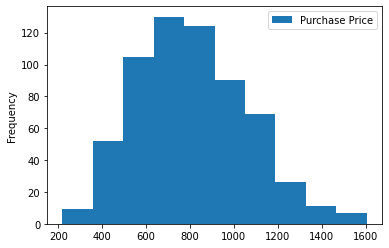

In [30]:
job_purchase.plot(kind='hist')

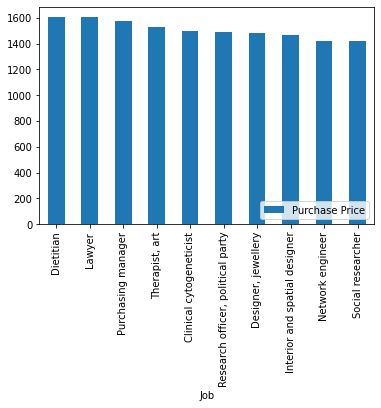

In [31]:
#Plotting the top 10 jobs with the highest purchase price in bar chart
job_purchase.head(10).plot(kind='bar')
plt.legend(loc='lower right')
plt.show()

In [32]:
#sort the total purchase price of every job

In [33]:
selected_data['Company'].nunique()

8653

In [34]:
company_purchase = selected_data.groupby('Company').sum().sort_values(by=['Purchase Price'], ascending=False)
company_purchase

,Purchase Price
Company,
Brown Ltd,796.38
Williams LLC,723.63
Smith LLC,637.92
Smith PLC,601.37
Johnson Ltd,600.61
...,...
Washington-Johnson,0.03
Armstrong PLC,0.02
Sanchez-Stephenson,0.01


In [35]:
company_purchase.describe()

,Purchase Price
count,8653.000000
mean,58.184794
std,47.293323
min,0.000000
25%,27.630000
50%,54.430000
75%,80.400000
max,796.380000


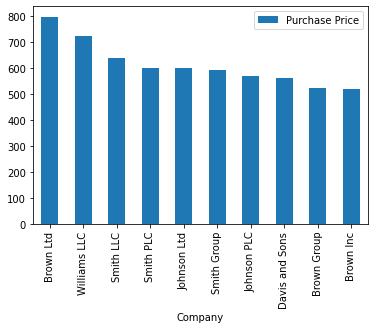

In [36]:
company_purchase.head(10).plot(kind='bar')

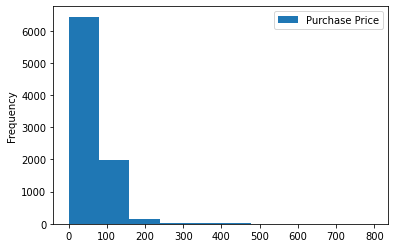

In [37]:
company_purchase.plot(kind='hist')